<a href="https://colab.research.google.com/github/sipocz/Blood/blob/main/Blood_AI_LSTM_20220113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [24]:
fname_url="https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip"
fname=fname_url.split("/")[-1]

In [25]:
!wget $fname_url


--2022-01-13 15:03:33--  https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip [following]
--2022-01-13 15:03:33--  https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16979362 (16M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  16.19M  --.-KB/s    in 0.1s    

2022-01-13 15:03:33 (140 MB/s) - ‘train.zi

In [26]:
!mkdir "train"
!rm ./train/Train.csv

rm: cannot remove './train/Train.csv': No such file or directory


In [27]:
!unzip $fname -d "./train"
!rm train.zip

Archive:  train.zip
  inflating: ./train/Train.csv       


In [28]:
fname_train="./train/Train.csv"
df=pd.read_csv(fname_train)

In [29]:
df.head(25)

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,...,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,0.556193,0.552271,0.550086,0.546207,0.542366,0.539789,0.537221,0.534336,0.533868,0.533018,0.532227,0.530818,0.532171,0.533658,0.535266,0.538939,0.542399,0.546479,0.550606,...,1.552979,1.541997,1.533186,1.518359,1.498964,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,1.379410,1.374128,1.356969,1.352693,1.342430,1.339714,1.332805,1.336324,1.342537,1.332407,1.326258,1.336874,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,0.505892,0.518125,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,0.542207,0.539779,0.536417,0.533380,0.531117,0.529093,0.526101,0.524599,0.522952,0.521551,0.521149,0.520478,0.521432,0.521473,0.523567,0.525816,0.527889,0.530697,0.533416,...,1.516723,1.502255,1.489132,1.483308,1.461028,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,1.357758,1.354854,1.345476,1.333810,1.332739,1.335550,1.326775,1.336862,1.316860,1.328051,1.328641,1.323526,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,0.565502,0.581143,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,0.594303,0.589403,0.585883,0.581369,0.578962,0.575181,0.573274,0.570471,0.568241,0.565671,0.564579,0.563724,0.561978,0.562744,0.563455,0.565163,0.566505,0.569239,0.572075,...,1.442957,1.423349,1.413718,1.403112,1.393964,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,1.283460,1.278300,1.268486,1.268407,1.263479,1.252612,1.254306,1.247635,1.242321,1.247859,1.246749,1.249920,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.55

In [30]:
def one_hot_encode_df(df,str_index):
    from sklearn.preprocessing import OneHotEncoder
    indf=df.copy(True)
    one_hot=OneHotEncoder()
    col=indf[str_index].values
    col=col.reshape(-1,1)
    one_hot.fit(col)
    out=one_hot.transform(col).toarray()
    codes=one_hot.get_feature_names()
    print(codes)
    for ind,code in enumerate(codes):
        print("Itt:",ind,codes[ind])
        indf[str_index+"_"+code]=out[:,ind]
    return(indf,one_hot)


In [31]:
hdl_col_df,hdl_onehot=one_hot_encode_df(df,"hdl_cholesterol_human")
hemo_df,hemo_onehot=one_hot_encode_df(df,"hemoglobin(hgb)_human")
col_df,col_onehot=one_hot_encode_df(df,"cholesterol_ldl_human")

['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
hemo_df.tail()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,hemoglobin(hgb)_human_x0_high,hemoglobin(hgb)_human_x0_low,hemoglobin(hgb)_human_x0_ok
13135,ID_NGPC0DA3,0.483513,0.482732,0.487531,0.497946,0.500697,0.505740,0.511904,0.519018,0.529455,0.540356,0.554324,0.563337,0.568932,0.573057,0.575291,0.574014,0.573149,0.570979,0.567632,0.564020,0.560878,0.557749,0.554752,0.552457,0.548313,0.547369,0.544267,0.542225,0.542338,0.539435,0.539836,0.539883,0.540450,0.541485,0.542836,0.544809,0.548269,0.552457,0.556129,...,1.372840,1.357367,1.342472,1.334482,1.326614,1.314757,1.301887,1.292316,1.296431,1.281496,1.278615,1.268085,1.256004,1.255005,1.245078,1.245569,1.231796,1.228750,1.238677,1.230577,1.218419,1.224957,1.220593,1.218087,1.214382,1.208455,1.202338,1.189651,1.182641,1.206917,1.188173,1.188303,34.79,36.93,high,ok,ok,0.0,0.0,1.0
13136,ID_XRBUD5U8,0.525435,0.527563,0.528863,0.531776,0.541156,0.547318,0.552549,0.559060,0.566892,0.581571,0.595248,0.603612,0.611313,0.614295,0.617476,0.617077,0.618908,0.616631,0.610841,0.604681,0.601588,0.598501,0.594149,0.589455,0.587673,0.584746,0.581093,0.580218,0.578071,0.577839,0.576454,0.576026,0.576220,0.579007,0.581564,0.584409,0.587786,0.591168,0.595874,...,1.545593,1.521200,1.518922,1.508497,1.501945,1.487737,1.481170,1.457265,1.444710,1.452271,1.428153,1.421319,1.419508,1.411549,1.415561,1.405296,1.390187,1.384455,1.383000,1.380202,1.383244,1.378410,1.377784,1.359367,1.379885,1.378378,1.367057,1.388165,1.375223,1.372435,1.395317,1.387709,43.12,19.14,ok,ok,ok,0.0,0.0,1.0
13137,ID_2M9L5NV2,0.512718,0.517815,0.524857,0.525466,0.536542,0.542930,0.550628,0.558939,0.567593,0.579192,0.595752,0.609749,0.617717,0.621270,0.625333,0.626705,0.623455,0.622948,0.618986,0.616963,0.614392,0.610574,0.606732,0.604206,0.601527,0.597425,0.595800,0.592601,0.590437,0.589152,0.588726,0.587134,0.588214,0.589699,0.590376,0.592544,0.594104,0.599264,0.603341,...,1.509437,1.497262,1.487541,1.481796,1.460926,1.458425,1.445150,1.430362,1.427516,1.420605,1.414007,1.415796,1.395715,1.399176,1.392111,1.384322,1.376676,1.364141,1.363428,1.366804,1.371499,1.367140,1.364490,1.367668,1.362808,1.385546,1.386140,1.396862,1.377644,1.428150,1.447840,1.384221,42.48,43.41,ok,ok,ok,0.0,0.0,1.0
13138,ID_C5V5SD2D,0.456747,0.472575,0.466935,0.466698,0.478546,0.486451,0.494838,0.496540,0.508274,0.521304,0.532652,0.542257,0.550854,0.556305,0.558084,0.559439,0.558418,0.554719,0.554852,0.552821,0.551641,0.549722,0.545233,0.542932,0.539894,0.536520,0.534783,0.530619,0.531076,0.530187,0.528713,0.527754,0.529230,0.529761,0.531586,0.533869,0.535897,0.539685,0.543911,...,1.350871,1.331415,1.326455,1.322705,1.310202,1.302262,1.294962,1.287724,1.283147,1.269678,1.257537,1.259994,1.248000,1.253335,1.237789,1.228726,1.224605,1.224872,1.217346,1.225207,1.224785,1.214651,1.214882,1.214873,1.217364,1.208545,1.185192,1.181483,1.172430,1.174544,1.154095,1.212907,41.86,35.10,ok,ok,ok,0.0,0.0,1.0
13139,ID_9R5ZR9NX,0.498372,0.501692,0.505924,0.510975,0.516707,0.520821,0.531242,0.5373

In [33]:
del hdl_col_df["hdl_cholesterol_human"]
del hdl_col_df["hemoglobin(hgb)_human"]
del hdl_col_df["cholesterol_ldl_human"]
del hemo_df["hdl_cholesterol_human"]
del hemo_df["hemoglobin(hgb)_human"]
del hemo_df["cholesterol_ldl_human"]
del col_df["hdl_cholesterol_human"]
del col_df["hemoglobin(hgb)_human"]
del col_df["cholesterol_ldl_human"]




In [34]:
hdl_col_df.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human_x0_high,hdl_cholesterol_human_x0_low,hdl_cholesterol_human_x0_ok
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,...,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,0.0,0.0,1.0
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,0.556193,0.552271,0.550086,0.546207,0.542366,0.539789,0.537221,0.534336,0.533868,0.533018,0.532227,0.530818,0.532171,0.533658,0.535266,0.538939,0.542399,0.546479,0.550606,...,1.552979,1.541997,1.533186,1.518359,1.498964,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,1.379410,1.374128,1.356969,1.352693,1.342430,1.339714,1.332805,1.336324,1.342537,1.332407,1.326258,1.336874,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,0.0,0.0,1.0
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,0.505892,0.518125,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,0.542207,0.539779,0.536417,0.533380,0.531117,0.529093,0.526101,0.524599,0.522952,0.521551,0.521149,0.520478,0.521432,0.521473,0.523567,0.525816,0.527889,0.530697,0.533416,...,1.516723,1.502255,1.489132,1.483308,1.461028,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,1.357758,1.354854,1.345476,1.333810,1.332739,1.335550,1.326775,1.336862,1.316860,1.328051,1.328641,1.323526,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,0.0,0.0,1.0
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,0.565502,0.581143,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,0.594303,0.589403,0.585883,0.581369,0.578962,0.575181,0.573274,0.570471,0.568241,0.565671,0.564579,0.563724,0.561978,0.562744,0.563455,0.565163,0.566505,0.569239,0.572075,...,1.442957,1.423349,1.413718,1.403112,1.393964,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,1.283460,1.278300,1.268486,1.268407,1.263479,1.252612,1.254306,1.247635,1.242321,1.247859,1.246749,1.249920,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,0.0,1.0,0.0
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.53527

In [35]:
hdl_col_df.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human_x0_high,hdl_cholesterol_human_x0_low,hdl_cholesterol_human_x0_ok
count,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,...,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,0.507347,0.509800,0.513687,0.519391,0.525976,0.533482,0.539453,0.544755,0.552902,0.565279,0.578415,0.590215,0.597083,0.600618,0.602828,0.603434,0.602075,0.599335,0.596222,0.593066,0.589816,0.586821,0.583665,0.580336,0.577325,0.574321,0.571803,0.569906,0.568239,0.566951,0.566204,0.565929,0.566327,0.567358,0.568966,0.571237,0.574091,0.577933,0.581767,0.585947,...,1.494436,1.481857,1.470147,1.458943,1.447029,1.436010,1.424403,1.413153,1.402854,1.394788,1.382297,1.373392,1.364888,1.356420,1.348587,1.341277,1.333918,1.327140,1.320583,1.314208,1.309417,1.305020,1.301597,1.299224,1.298162,1.297279,1.296103,1.292939,1.287715,1.279190,1.271131,1.264782,1.262234,1.274563,1.261993,41.088709,31.534744,0.196347,0.232877,0.570776
std,0.042075,0.041587,0.041525,0.041676,0.041125,0.040644,0.040715,0.040946,0.040820,0.041038,0.041164,0.041268,0.041501,0.041560,0.041508,0.041379,0.041080,0.040716,0.040453,0.040368,0.040127,0.040101,0.040019,0.039927,0.039915,0.039767,0.039740,0.039792,0.039787,0.039715,0.039708,0.039738,0.039781,0.039860,0.039862,0.039979,0.040065,0.040266,0.040384,0.040327,...,0.073972,0.072704,0.071497,0.070351,0.069132,0.068116,0.066951,0.066179,0.065450,0.065161,0.063811,0.063188,0.062849,0.062148,0.061847,0.061448,0.060891,0.060457,0.060267,0.059903,0.059883,0.059731,0.059607,0.059692,0.060137,0.060583,0.062033,0.064989,0.069659,0.077427,0.085519,0.092525,0.097079,0.103298,0.102908,2.964205,8.118994,0.397249,0.422680,0.494984
min,0.237409,0.251987,0.269550,0.284636,0.302883,0.318334,0.333950,0.345124,0.361352,0.374106,0.388672,0.407299,0.416705,0.420315,0.423078,0.423848,0.423839,0.422310,0.421942,0.419578,0.416689,0.414667,0.413794,0.410312,0.408713,0.405934,0.403518,0.402689,0.401398,0.400746,0.399525,0.399710,0.399237,0.400620,0.403256,0.404547,0.407792,0.412233,0.416269,0.421089,...,1.258771,1

In [36]:
minmax=MinMaxScaler()
minmax.fit(hdl_col_df.iloc[:,1:])
data_transform=minmax.transform(hdl_col_df.iloc[:,1:])

In [37]:
X=data_transform[:,:-3]
y_hdl_col=hdl_col_df.iloc[:,-3:]
y_hemo=hemo_df.iloc[:,-3:]
y_hemo=hemo_df.iloc[:,-3:]
y_col=col_df.iloc[:,-3:]

In [38]:
import tensorflow as tf
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout,Embedding, Flatten,LayerNormalization, LSTM
from keras.models import Sequential, Model

import keras.optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld,mse

from keras.preprocessing.sequence import pad_sequences

In [41]:
len(X[0])


172

In [52]:
y_col

,cholesterol_ldl_human_x0_high,cholesterol_ldl_human_x0_low,cholesterol_ldl_human_x0_ok
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13135,0.0,0.0,1.0
13136,0.0,0.0,1.0
13137,0.0,0.0,1.0
13138,0.0,0.0,1.0


LSTM MODEL TESZT


In [53]:
def model_lstm():
    from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout
    from tensorflow.keras.layers import GRU,Concatenate
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax
    from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
    from tensorflow.keras import backend as K
    max_input_length=172
    K.clear_session
    x= Input(shape=(max_input_length,1))

  
    #conv1=Conv1D(filters=64, kernel_size=3, padding='same', )(embedded_x)
    units=25
    n_out=3



    #MP=MaxPooling1D(pool_size=1)(conv1)
    lstm_output0= LSTM(units=units,return_sequences=True,dropout=0.1,return_state=True,name="lstm_0")(x)  # recurrent_dropout=0.2 ?
    lstm_output1= LSTM(units=units ,return_sequences=True,dropout=0.1,return_state=True,name="lstm_1")(lstm_output0)  # recurrent_dropout=0.2 ?
    lstm_output2= LSTM(units=units ,return_sequences=True,dropout=0.1,return_state=True,name="lstm_2")(lstm_output1)  # recurrent_dropout=0.2 ?
    
    #lstm_output=Dropout(0.1)(lstm_output1)
    c1=Concatenate(axis=1,name="con1")([lstm_output0[0],lstm_output1[0]])
    c2=Concatenate(axis=1,name="con2")([c1,lstm_output2[0]])
    # 202201092235
    cc1=Concatenate(axis=1,name="ccon1")([lstm_output0[1],lstm_output1[1]])
    cc2=Concatenate(axis=1,name="ccon2")([cc1,lstm_output2[1]])
    ccc1=Concatenate(axis=1,name="cccon1")([lstm_output0[2],lstm_output1[2]])
    ccc2=Concatenate(axis=1,name="cccon2")([ccc1,lstm_output2[2]])
    ccc_out=Concatenate(axis=1,name="ccc_out")([cc2,ccc2])

    #20220109223500




    lstm_output=Flatten()(ccc_out)
    
    Dense_out1= Dense(150, activation="sigmoid",kernel_initializer="HeNormal")(lstm_output)   # activation="sigmoid",kernel_initializer="HeNormal"
    #Dense_out= Dense(80, activation="sigmoid",kernel_initializer="HeNormal")(Dense_out1)   

    #Dense_out= Dense(80, activation="relu",kernel_initializer="HeNormal")(Dense_out)
    #Dense_out= Dropout(0.1)(Dense_out)


    predictions= Dense(n_out, activation="softmax")(Dense_out1)
    model=Model(inputs=x, outputs=predictions)
    return(model)







In [54]:
__MAXWORD__=200

max_input_length=170
max_list=99


In [55]:
model_dict={"lstm":model_lstm}

In [56]:
_MODEL_TYPE_="lstm"
model=model_dict[_MODEL_TYPE_]()

In [59]:
  from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout
  from tensorflow.keras.layers import GRU,Concatenate
  from tensorflow.keras.models import Model
  from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax
  from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
  from tensorflow.keras import backend as K

In [61]:
!pip install tensorflow_addons


     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [62]:
import tensorflow_addons as tfa

In [68]:

loss =categorical_crossentropy #mean_squared_error #categorical_crossentropy 
if _MODEL_TYPE_=="encoderdecoder":
    
    loss=mean_squared_error
    optimizer = Adam(learning_rate=0.001) #ADAM
    model.compile(optimizer=optimizer,loss=loss )

elif _MODEL_TYPE_=="lstm":
    f1score=tfa.metrics.F1Score(num_classes=3)
    # Optimizer
    optimizer = Adam(learning_rate=0.01) #RMSprop
 
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

elif _MODEL_TYPE_=="deepnet":
    f1score=tfa.metrics.F1Score(num_classes=15)
    # Optimizer
    optimizer = Adam(learning_rate=0.001) #RMSprop
    loss=categorical_crossentropy
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

elif _MODEL_TYPE_=="conv":
    f1score=tfa.metrics.F1Score(num_classes=15)
    # Optimizer
    optimizer = Adam(learning_rate=0.001) #RMSprop
 
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

In [73]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
model_name="PoLaCa_LSTM"
def scheduler(epoch, lr):
    
        
    
    maxx=0.00015
    minn=0.00015
    frekvency=4
    o=(epoch % frekvency)/frekvency * (maxx-minn)+minn
    print(f"lr--{o}")
    return o

        
    if epoch<50:
        return 0.001
    elif epoch <100:
        return 0.001
    elif epoch <1200:
        return 0.0001
    return 0.001
    
callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

if _MODEL_TYPE_=="encoderdecoder":

    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]
elif _MODEL_TYPE_=="conv":
    model_name=_MODEL_TYPE_.upper()

    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VACC_{val_accuracy:.4f}_VF1.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]

elif _MODEL_TYPE_=="deepnet":


    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VACC_{val_accuracy:.4f}_VF1.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]

elif _MODEL_TYPE_=="lstm":

    model_name=_MODEL_TYPE_.upper()
    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}__ACC_{accuracy:.4f}_VACC_.hdf5", monitor='loss', #{val_accuracy:.4f} VLOSS_{val_loss:.5f}
                            verbose=1, save_best_only=True, mode='min')]

In [ ]:
# Illesszük az adatra a modellt
if _MODEL_TYPE_=="lstm":
        history=model.fit(
                x=X,
                y=y_col, 
                epochs=200, 
                batch_size=32,
               # validation_data=(x_valid,y_valid) ,         
                callbacks=[callbacks]          
                )

lr--0.00015
Epoch 1/200
409/411 [============================>.] - ETA: 0s - loss: 0.8280 - accuracy: 0.5565 - f1_score: 0.2915
Epoch 00001: loss improved from inf to 0.82805, saving model to LSTM_LOSS_0.82805__ACC_0.5565_VACC_.hdf5
411/411 [==============================] - 8s 19ms/step - loss: 0.8280 - accuracy: 0.5565 - f1_score: 0.2924 - lr: 1.5000e-04
lr--0.00015
Epoch 2/200
409/411 [============================>.] - ETA: 0s - loss: 0.8257 - accuracy: 0.5665 - f1_score: 0.3311
Epoch 00002: loss improved from 0.82805 to 0.82573, saving model to LSTM_LOSS_0.82573__ACC_0.5661_VACC_.hdf5
411/411 [==============================] - 8s 19ms/step - loss: 0.8257 - accuracy: 0.5661 - f1_score: 0.3308 - lr: 1.5000e-04
lr--0.00015
Epoch 3/200
409/411 [============================>.] - ETA: 0s - loss: 0.8241 - accuracy: 0.5713 - f1_score: 0.3338
Epoch 00003: loss improved from 0.82573 to 0.82396, saving model to LSTM_LOSS_0.82396__ACC_0.5715_VACC_.hdf5
411/411 [==============================] 

In [ ]:
def blood_model():
    #clear_session()



    input_len=len(X[0])

    print(input_len)
    output_size=3
    drop_frac0=0.0 
    drop_frac1=0.0



    input1=Input(shape=(input_len,),)

    #flatt=Flatten()(lstm1)

    non=42
    #initializer = tf.keras.initializers.LecunNormal()
    #initializer=tf.keras.initializers.LecunUniform()
    #initializer=tf.keras.initializers.HeUniform(    seed=None)
    #initializer= tf.keras.initializers.RandomNormal(    mean=3.0, stddev=0.05, seed=None)

    initializer="normal"
    d1=Dense(9,activation="selu",kernel_initializer=initializer,input_dim=input_len,name="bottle")(input1)
    d1=Dropout(drop_frac0)(d1)
    


    pred=Dense(input_len,activation="selu")(d1)

    model = Model(inputs=input1, outputs=pred)

    opt = tf.keras.optimizers.Adamax(learning_rate=0.01)


    #lossfn = tf.keras.metrics.MSE()

    model.compile(loss="MSE",
        optimizer=opt,
        metrics=["MSE"])
    return(model)

In [ ]:
!rm *.hdf5

In [ ]:
model_name="hdl_col"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        
        #savemodela,
        ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [ ]:
hdl_model=blood_model()

172


In [ ]:
hdl_model.fit(X,
          X,
          epochs=450, 
          batch_size=32,
          validation_split=0.2,
          verbose=1,
          callbacks=callbacks,
          shuffle=True
          
          )

In [ ]:
model_name="col"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        

        
        #savemodela,
    ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [ ]:
col_model=blood_model()

172


In [ ]:
col_model.fit(X,
          X,
          epochs=230, 
          batch_size=22,
          validation_split=0.1,
          verbose=0,
          callbacks=callbacks,
          shuffle=False
          
          )

In [ ]:
model_name="hemo"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        
        #savemodela,
            ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [ ]:
hemo_model=blood_model()

172


In [ ]:
hemo_model.fit(X,
          X,
          epochs=230, 
          batch_size=12,
          validation_split=0.1,
          verbose=1,
          callbacks=callbacks,
          shuffle=False
          
          )

In [ ]:
X[0]

array([0.57629797, 0.56316263, 0.56058608, 0.55348446, 0.55432924,
       0.52801177, 0.52429853, 0.50529651, 0.49396945, 0.4908818 ,
       0.47677241, 0.47466856, 0.46398309, 0.46296189, 0.45314056,
       0.4461359 , 0.44496283, 0.44416027, 0.43586569, 0.43853278,
       0.43820073, 0.43619613, 0.43587531, 0.43594288, 0.42574665,
       0.43109712, 0.43362324, 0.43267825, 0.42976148, 0.43394287,
       0.43184588, 0.43866202, 0.4327672 , 0.431208  , 0.43553574,
       0.4331199 , 0.43502257, 0.4306428 , 0.43040646, 0.42566461,
       0.42792858, 0.42574241, 0.42172644, 0.42014705, 0.41649629,
       0.40968119, 0.4075168 , 0.40835163, 0.40112821, 0.39484841,
       0.39387877, 0.38614882, 0.38647705, 0.38217006, 0.37493735,
       0.3699833 , 0.36920971, 0.36554815, 0.36796923, 0.37310292,
       0.36670567, 0.36726969, 0.36314847, 0.36048029, 0.35013203,
       0.34812045, 0.34701882, 0.34821374, 0.34586192, 0.34227702,
       0.33816833, 0.33752315, 0.3293699 , 0.32742852, 0.32797

In [ ]:
col_pred=col_model.predict(X)
hemo_pred=hemo_model.predict(X)
hdl_pred=hdl_model.predict(X)


In [ ]:
# load models
from keras.models import load_model
base_path="./models/"

col_name_bottle=base_path+"col_0.00011_.hdf5"
hemo_name_bottle=base_path+"hemo_0.00012_.hdf5"
hdl_name_bottle=base_path+"hdl_col_0.00011_.hdf5"

col_model=load_model(col_name_bottle)
hemo_model=load_model(hemo_name_bottle)
hdl_model=load_model(hdl_name_bottle)


In [ ]:
col_model_bottle=Model(col_model.inputs,col_model.get_layer("bottle").output)
hemo_model_bottle=Model(hemo_model.inputs,hemo_model.get_layer("bottle").output)
hdl_model_bottle=Model(hdl_model.inputs,hdl_model.get_layer("bottle").output)




In [ ]:
col_pred_bottle=col_model_bottle.predict(X)
hemo_pred_bottle=hemo_model_bottle.predict(X)
hdl_pred_bottle=hdl_model_bottle.predict(X)



In [ ]:
col_pred_bottle

array([[ 1.0023874e+00, -1.7152926e-01,  7.8072733e-01, ...,
         2.6708689e-01,  1.0870309e+00,  8.6771220e-01],
       [ 1.5077180e+00, -1.2614600e-01,  1.2329315e+00, ...,
         5.3900707e-01,  1.2220757e+00,  7.9188347e-01],
       [ 1.4797244e+00, -1.3749507e-01,  1.0470641e+00, ...,
         6.0337514e-01,  1.0295019e+00,  9.0562814e-01],
       ...,
       [ 1.7762965e+00,  8.2648406e-04,  1.3377172e+00, ...,
         5.1759613e-01,  1.2506130e+00,  1.6925223e+00],
       [ 7.6701200e-01, -8.5423224e-02,  4.9993426e-01, ...,
         2.6282737e-01,  7.3671734e-01,  1.3329355e+00],
       [ 1.8276753e+00, -2.2859766e-01,  1.3788316e+00, ...,
         6.0244423e-01,  1.2723386e+00,  1.2614057e+00]], dtype=float32)

In [ ]:
NUM_OF_COMP=4

In [ ]:


import numpy as np
from sklearn.decomposition import PCA

col_pca = PCA(n_components=NUM_OF_COMP)
col_pca_values=col_pca.fit_transform(col_pred_bottle)

print(col_pca.explained_variance_ratio_)

print(col_pca.singular_values_)

[0.5904     0.2510775  0.06682388 0.0324425 ]
[77.88374  50.789925 26.202307 18.25706 ]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

hemo_pca = PCA(n_components=NUM_OF_COMP)
hemo_pca_values=hemo_pca.fit_transform(hemo_pred_bottle)

print(hemo_pca.explained_variance_ratio_)

print(hemo_pca.singular_values_)

[0.55360365 0.29172048 0.056209   0.03384098]
[69.85001  50.704967 22.257172 17.269846]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

hdl_pca = PCA(n_components=NUM_OF_COMP)
hdl_pca_values=hdl_pca.fit_transform(hdl_pred_bottle)

print(hdl_pca.explained_variance_ratio_)

print(hdl_pca.singular_values_)

[0.610399   0.28160116 0.04182229 0.02223142]
[82.674736 56.154312 21.640625 15.777912]


In [ ]:
colors=df["hdl_cholesterol_human"]


In [ ]:
colors_num=[]
for col in colors:
    if col=="ok":
        colors_num.append(0)
    if col=="high":
        colors_num.append(12)
    if col=="low":
        colors_num.append(24)
    
        

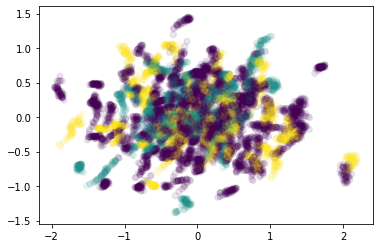

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(col_pca_values[:,0], col_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

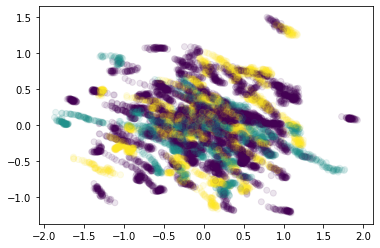

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(hemo_pca_values[:,0], hemo_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

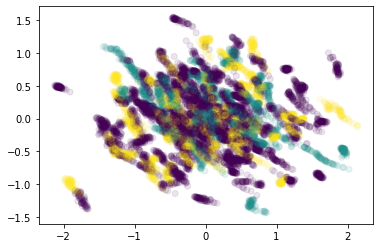

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(hdl_pca_values[:,0], hdl_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

In [ ]:
col_pred_bottle=col_model_bottle.predict(X)
hemo_pred_bottle=hemo_model_bottle.predict(X)
hdl_pred_bottle=hdl_model_bottle.predict(X)
df["hdl_cholesterol_human"]

0          ok
1          ok
2          ok
3         low
4          ok
         ... 
13135    high
13136      ok
13137      ok
13138      ok
13139    high
Name: hdl_cholesterol_human, Length: 13140, dtype: object

In [ ]:
df.head(0)

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human


In [ ]:
# def a search matrix
def create_search_list(pred,df,str_index):
    out=[]
    for i,vec in enumerate(pred):
        out.append([vec,df[str_index].values[i]])
    return(out)
    
    

In [ ]:
col_search_list=create_search_list(col_pred_bottle,df,"cholesterol_ldl_human")
hemo_search_list=create_search_list(hemo_pred_bottle,df,"hemoglobin(hgb)_human")

hdl_search_list=create_search_list(hdl_pred_bottle,df,"hdl_cholesterol_human")

In [ ]:
col_search_list[0:8]

[[array([ 1.0023874 , -0.17152926,  0.7807273 , -0.3064185 ,  0.8985935 ,
         -0.2756584 ,  0.2670869 ,  1.0870309 ,  0.8677122 ], dtype=float32),
  'ok'],
 [array([ 1.507718  , -0.126146  ,  1.2329315 , -0.30984885,  1.1060677 ,
         -0.11846285,  0.53900707,  1.2220757 ,  0.79188347], dtype=float32),
  'high'],
 [array([ 1.4797244 , -0.13749507,  1.0470641 , -0.05418213,  0.6311482 ,
         -0.11460508,  0.60337514,  1.0295019 ,  0.90562814], dtype=float32),
  'high'],
 [array([ 1.2184584 , -0.10153126,  0.62347853, -0.34787345,  0.6755314 ,
         -0.29817125,  0.49377733,  1.1667781 ,  1.3839679 ], dtype=float32),
  'high'],
 [array([ 1.2081895 , -0.3171554 ,  1.0326277 , -0.14286268,  0.8144701 ,
         -0.33406392,  0.3450993 ,  1.0061659 ,  1.967993  ], dtype=float32),
  'high'],
 [array([ 1.4925443 , -0.38200963,  1.741494  , -0.44272128,  1.6574074 ,
         -0.11864759,  0.53931135,  1.783843  ,  1.2375283 ], dtype=float32),
  'ok'],
 [array([ 0.31410152, -0.2

In [ ]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))


In [ ]:
# calculate a cosine similarity between items im col_search_list
item1=col_search_list[5][0]
item2=col_search_list[7][0]

print(cosine_similarity(item1,item2))

0.92380166


In [ ]:
def generate_similarity(it1,sim_table):
    out=[]
    for it2 in sim_table:
        
        diff=cosine_similarity(it1,it2[0])
        if 1-diff<0.002:
            
            out.append(it2[1])
    return(out)

In [ ]:
simgent=generate_similarity(item1,col_search_list)

In [ ]:
def statistic(a):
    c=list(set(a))
    #print(c)
    out={}
    for i in c:
        out[i]=a.count(i)
    return(out)

In [ ]:
def find_max(dict):
    max=0
    sum=0
    outkey=""
    for key in dict.keys():
        akt=dict[key]
        sum+=akt
        if max<akt:
            max=akt
            outkey=key
    return outkey,max

In [ ]:
result,_=find_max(statistic(simgent))
result

'ok'

### ----

In [ ]:
import numpy as np
col_argm=np.argmax(col_pred,axis=1)
hemo_argm=np.argmax(hemo_pred,axis=1)
hdl_argm=np.argmax(hdl_pred,axis=1)




In [ ]:
def calc_status(pred,dfcolumn):
    i=0
    for index,element in enumerate(pred):

        if element != dfcolumn.iloc[index]:
            #print(f"{index}")
            i +=1
    print(f"{i} hibás, {i/len(pred)*100} % hiba")        

In [ ]:
# submission generation
!rm "./Test.csv"

In [ ]:
!wget https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv

--2021-11-30 22:47:04--  https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv [following]
--2021-11-30 22:47:04--  https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10299206 (9,8M) [text/plain]
Saving to: ‘Test.csv’

Test.csv            100%[===================>]   9,82M  10,1MB/s    in 1,0s    

2021-11-30 22:47:05 (10,1 MB/s) - ‘Test.csv’ saved

In [ ]:
test_df=pd.read_csv("./Test.csv")
test_df.head()

test_df['hdl_cholesterol_human']=0
test_df["hemoglobin(hgb)_human"]=0
test_df["cholesterol_ldl_human"]=0

In [ ]:
test_transform=minmax.transform(test_df.iloc[:,1:])

In [ ]:
X_test=test_transform[:,:-3]

In [ ]:
col_pred_test_bottle=col_model_bottle.predict(X_test)
hemo_pred_test_bottle=hemo_model_bottle.predict(X_test)
hdl_pred_test_bottle=hdl_model_bottle.predict(X_test)

### a predikalt értékeket a search_list -hez kell hasonlítani

In [ ]:
import numpy as np


In [ ]:
col_predicted_test=[]
hemo_predicted_test=[]
hdl_predicted_test=[]

In [ ]:
col_result=[]
for test_i in col_pred_test_bottle:
    o1=generate_similarity( test_i, col_search_list)
    result,_=find_max(statistic(o1))
    if result=="":
        result="NaN"
    print(result,end=",")
    col_result.append(result)

NaN,ok,NaN,NaN,NaN,ok,ok,NaN,low,high,NaN,NaN,NaN,NaN,high,ok,NaN,NaN,high,ok,ok,ok,ok,NaN,NaN,high,NaN,ok,ok,NaN,high,high,high,NaN,NaN,ok,high,NaN,NaN,ok,NaN,NaN,ok,ok,NaN,high,NaN,NaN,ok,high,NaN,NaN,high,NaN,ok,ok,high,NaN,high,high,NaN,ok,NaN,NaN,NaN,NaN,ok,high,ok,NaN,high,ok,NaN,ok,ok,NaN,NaN,NaN,NaN,NaN,ok,low,high,NaN,NaN,high,ok,ok,ok,NaN,high,NaN,ok,ok,NaN,ok,NaN,ok,NaN,NaN,ok,ok,NaN,NaN,NaN,NaN,ok,ok,NaN,NaN,NaN,ok,NaN,ok,high,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,high,high,high,ok,NaN,ok,NaN,NaN,NaN,high,ok,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,high,NaN,ok,ok,NaN,ok,high,high,ok,ok,NaN,NaN,high,NaN,NaN,ok,high,NaN,NaN,high,ok,ok,NaN,NaN,high,ok,high,ok,NaN,ok,high,low,NaN,NaN,high,NaN,high,high,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,high,NaN,ok,ok,NaN,NaN,high,NaN,NaN,NaN,high,NaN,high,high,NaN,high,ok,ok,NaN,NaN,NaN,ok,high,NaN,ok,ok,NaN,NaN,high,NaN,NaN,ok,NaN,NaN,NaN,high,NaN,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,ok,high,NaN,NaN,high,NaN,high,ok,high,NaN,ok,NaN,NaN,high,NaN,ok,NaN,high,high,NaN,ok,N

In [ ]:
hemo_result=[]
for test_i in hemo_pred_test_bottle:
    o1=generate_similarity( test_i, hemo_search_list)
    result,_=find_max(statistic(o1))
    if result=="":
        result="NaN"
    print(result,end=",")
    hemo_result.append(result)

NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,ok,NaN,NaN,ok,ok,NaN,NaN,ok,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,ok,NaN,low,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,ok,low,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,ok,NaN,ok,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,ok,NaN,ok,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,low,NaN,ok,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
hdl_result=[]
for test_i in hdl_pred_test_bottle:
    o1=generate_similarity( test_i, hdl_search_list)
    result,_=find_max(statistic(o1))
    if result=="":
        result="NaN"
    print(result,end=",")
    hdl_result.append(result)

NaN,ok,NaN,NaN,ok,ok,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,low,low,NaN,NaN,ok,ok,ok,NaN,ok,NaN,NaN,high,NaN,ok,ok,NaN,ok,low,ok,NaN,NaN,ok,ok,NaN,NaN,ok,NaN,NaN,ok,low,NaN,low,NaN,NaN,ok,high,NaN,ok,ok,NaN,high,ok,ok,NaN,high,ok,NaN,ok,ok,ok,NaN,ok,ok,ok,ok,NaN,low,low,NaN,ok,ok,low,NaN,high,ok,ok,high,high,high,NaN,ok,ok,low,ok,NaN,NaN,ok,NaN,ok,ok,NaN,high,NaN,ok,NaN,high,ok,NaN,NaN,NaN,NaN,NaN,ok,ok,NaN,ok,NaN,ok,NaN,ok,NaN,ok,NaN,high,NaN,NaN,NaN,NaN,low,ok,NaN,low,ok,ok,ok,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,ok,NaN,high,NaN,ok,NaN,ok,ok,NaN,ok,ok,ok,ok,NaN,NaN,ok,ok,NaN,NaN,ok,ok,NaN,high,low,ok,ok,NaN,NaN,ok,ok,low,ok,NaN,ok,ok,ok,ok,NaN,ok,ok,low,ok,low,NaN,NaN,ok,NaN,ok,low,NaN,ok,NaN,ok,NaN,ok,NaN,low,NaN,ok,high,high,NaN,ok,ok,NaN,ok,ok,ok,ok,high,high,ok,ok,NaN,low,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,ok,NaN,NaN,high,NaN,NaN,NaN,NaN,high,NaN,ok,low,NaN,NaN,low,NaN,ok,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,ok,ok,ok,ok,ok,ok,NaN,NaN,high,NaN,ok,NaN,NaN,ok,NaN,high,NaN,low,ok,NaN,ok,ok,ok,NaN,ok,

In [ ]:
outdf=pd.DataFrame()
outdf["Reading_ID"]=test_df["Reading_ID"]
outdf["hemoglobin(hgb)_human"]=hemo_result
outdf["cholesterol_ldl_human"]=col_result
outdf["hdl_cholesterol_human"]=hdl_result

outdf.set_index("Reading_ID",inplace=True)

In [ ]:
outdf.head(33)

,hemoglobin(hgb)_human,cholesterol_ldl_human,hdl_cholesterol_human
Reading_ID,,,
ID_37BEI22R,NaN,NaN,NaN
ID_4W85V5DV,NaN,ok,ok
ID_L4YR3NDY,NaN,NaN,NaN
ID_U88E3SQ6,NaN,NaN,NaN
ID_NW7Z3XU7,NaN,NaN,ok
ID_W3SBFMVX,NaN,ok,ok
ID_27P6YL52,ok,ok,ok
ID_6VJ41WZC,NaN,NaN,NaN
ID_S0ISRB3K,NaN,low,ok


In [ ]:
!rm SampleSubmission.csv
!wget https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv

--2021-11-30 23:04:11--  https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv [following]
--2021-11-30 23:04:11--  https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384318 (375K) [text/plain]
Saving to: ‘SampleSubmission.csv’

SampleSubmission.cs 100%[===================>] 375,31K  --.-KB/s    in 0,1s    

2021

In [ ]:
submission_df=pd.read_csv("./SampleSubmission.csv")

In [ ]:
for i in submission_df.index:
    #print(i)
    indexer=submission_df.loc[i,"Reading_ID"]

    splitter=indexer.split("_",2)
    out_index=splitter[0]+"_"+splitter[1]
    col_index=splitter[2]
    #print(out_index)
    result=outdf.loc[out_index][col_index]
    submission_df.iloc[i,1]=result

In [ ]:
submission_df.set_index("Reading_ID", inplace=True)

In [ ]:
def create_submission_name(project):
    from datetime  import datetime
    strdate=datetime.now().strftime("%Y%m%d_%H%M%S")
    out=project+"_"+"submission"+"_"+strdate+".csv"
    return(out)

In [ ]:
submission_fname=create_submission_name("BloodAI")

In [ ]:
submission_fname

'BloodAI_submission_20211130_230422.csv'

In [ ]:
submission_df.to_csv(submission_fname,index=True)

In [ ]:
!head $submission_fname

Reading_ID,target
ID_00902R9H_hdl_cholesterol_human,NaN
ID_00902R9H_hemoglobin(hgb)_human,NaN
ID_00902R9H_cholesterol_ldl_human,NaN
ID_00FQS7AO_hdl_cholesterol_human,high
ID_00FQS7AO_hemoglobin(hgb)_human,NaN
ID_00FQS7AO_cholesterol_ldl_human,NaN
ID_00QJTIBO_hdl_cholesterol_human,NaN
ID_00QJTIBO_hemoglobin(hgb)_human,NaN
ID_00QJTIBO_cholesterol_ldl_human,NaN
